# Monte Carlo Simulation of Stock Price Processes

## Table of Contents
* [1) Generate Geometric Brownian Motion (GBM)](#first-bullet)
    - [1a) GBM Non-Vectorized](#firsta-bullet)
    - [1b) GBM Vectorized](#firstb-bullet)
* [2) Generate Log-Normal (LN) Jump Processes](#second-bullet)
    - [2a) LN Jump Process Non-Vectorized](#seconda-bullet)
    - [2b) LN Jump Process Vectorized](#secondb-bullet)
* [3) Generate Constant Elasticity of Variance (CEV) Processes](#third-bullet)

## Setup

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import os

# local
from LSM import MonteCarloOptionPricing
from figs import plot_stock_price_simulations

In [2]:
# Initialize instance from class
mc_option_pricing = MonteCarloOptionPricing(r=0.06, S0=36., K=40., T=2., σ=0.2, λ=0.4, dim=10_000, n=50, seed=150_000)

## 1) Generate Geometric Brownian Motion (GBM) <a class="anchor" id="first-bullet"></a>

### 1a) GBM Non-Vectorized <a class="anchor" id="firsta-bullet"></a>

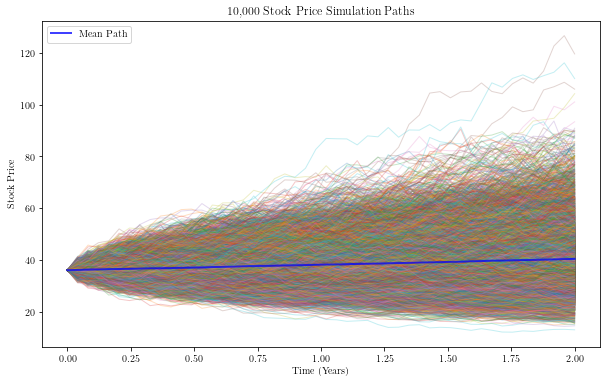

In [3]:
# Generate 'dim' no. of stock price process paths
simulated_paths = mc_option_pricing.GeometricBrownianMotion()

plot_stock_price_simulations(mc_option_pricing.T, mc_option_pricing.n, simulated_paths, mc_option_pricing.dim)

### 1b) GBM Vectorized <a class="anchor" id="firstb-bullet"></a>

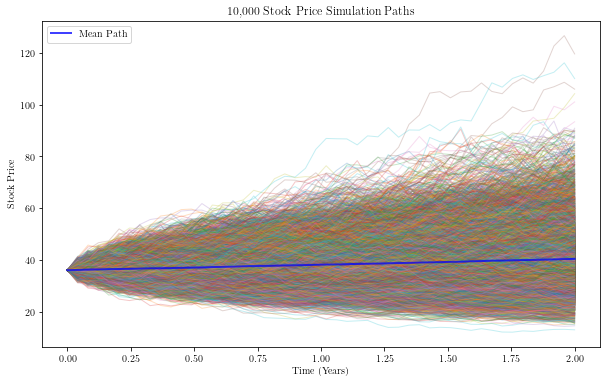

In [4]:
# Generate 'dim' no. of stock price process paths
simulated_paths = mc_option_pricing.GeometricBrownianMotion_vec()

# plot stock price process
plot_stock_price_simulations(mc_option_pricing.T, mc_option_pricing.n, simulated_paths, mc_option_pricing.dim)

## 2) Generate Log-Normal (LN) Jump Processes <a class="anchor" id="second-bullet"></a>

### 2a) LN Jump Processes Non-Vectorized <a class="anchor" id="seconda-bullet"></a>

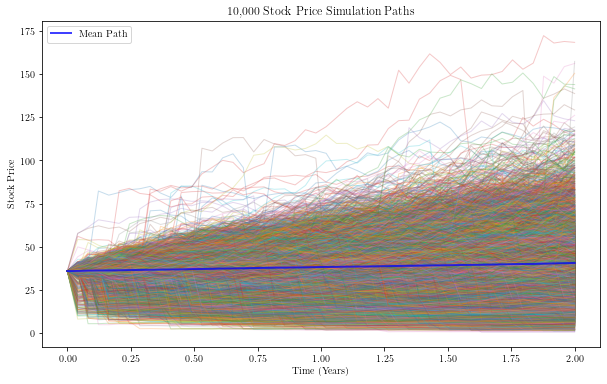

In [5]:
# Generate 'dim' no. of stock price process paths
simulated_paths = mc_option_pricing.MertonJumpDiffusion(α=-0.5,β=0.4)

# plot stock price process
plot_stock_price_simulations(mc_option_pricing.T, mc_option_pricing.n, simulated_paths, mc_option_pricing.dim)

### 2b) LN Jump Processes Vectorized <a class="anchor" id="secondb-bullet"></a>

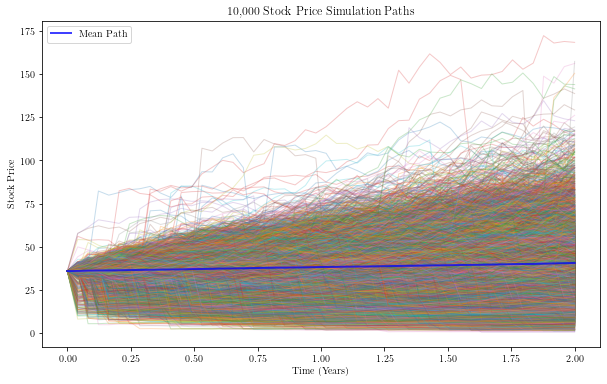

In [6]:
# Generate 'dim' no. of stock price process paths
simulated_paths = mc_option_pricing.MertonJumpDiffusion_vec(α=-0.5,β=0.4)

# plot stock price process
plot_stock_price_simulations(mc_option_pricing.T, mc_option_pricing.n, simulated_paths, mc_option_pricing.dim)

## 3) Generate Constant Elasticity of Variance (CEV) Processes <a class="anchor" id="third-bullet"></a>

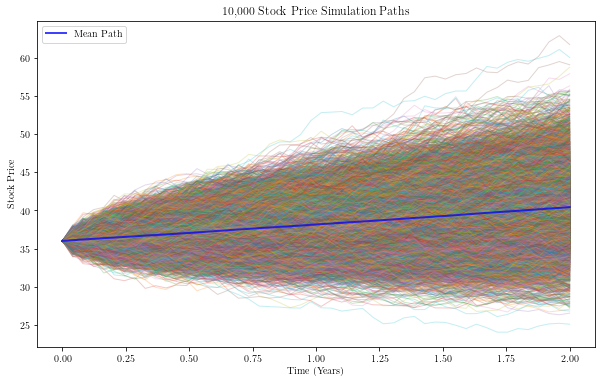

In [7]:
# Generate 'dim' no. of stock price process paths
simulated_paths = mc_option_pricing.CEV(γ=1.5)

# plot stock price process
plot_stock_price_simulations(mc_option_pricing.T, mc_option_pricing.n, simulated_paths, mc_option_pricing.dim)